In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
#import time
from collections import Counter
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import json
from scipy.cluster.hierarchy import dendrogram, linkage
import math

In [2]:
path = '/Users/stevenfelix/Dropbox/DataScience/Projects/PsychologyToday/data/'
data = pd.read_pickle(path+'psychologytoday.pkl')
with open(path + "profiledict.json", "r") as fd:
    profiledict = json.load(fd)
with open(path + "profilefeaturesdict_bool_dict.json", "r") as fd:
    featuresdict = json.load(fd)

In [6]:
## number of different treatment orientations
len(profiledict['treatmentorientation']['counts'].keys())

575

In [28]:
## boolean dataframe of indicator variable for treatments with >10 endorsements
to_df = pd.DataFrame(featuresdict['treatmentorientation'])

In [29]:
to_df.head()

,acceptance and commitment therapy (act),art therapy,attachment-based,coaching,cognitive behavioral (cbt),culturally sensitive,dialectical (dbt),eclectic,emdr,emotionally focused,existential,expressive arts,family / marital,family systems,feminist,forensic psychology,gestalt,gottman method,humanistic,hypnotherapy,imago,integrative,internal family systems,internal family systems (ifs),interpersonal,intervention,jungian,mindfulness,mindfulness-based (mbct),motivational interviewing,multicultural,narrative,none,person-centered,play therapy,positive psychology,psychoanalytic,psychodynamic,psychological testing and evaluation,relational,sand play,sensorimotor psychotherapy,solution focused brief (sfbt),somatic,strength based,transpersonal,trauma focused
Aaron Rezendes,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Abby Blackburn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Abigail McNally,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1
About Motherhood,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Adam H Wannie,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
cooccurence_t = []
cooccurence_d = {}
for ind,col in enumerate(to_df.iloc[:,:-1]):
    for ind2, col2 in enumerate(to_df.iloc[:,ind+1:]):
        cooccurence = np.sum(to_df[col] & to_df[col2])
        name = "{} & {}".format(col, col2)
        cooccurence_d[name] = cooccurence
        cooccurence_t.append((col, col2, cooccurence))

In [64]:
cooccurence_d['art therapy & coaching']

22L

In [68]:
G = nx.Graph()

In [69]:
G.add_weighted_edges_from(cooccurence_t)

/Users/stevenfelix/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/stevenfelix/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/stevenfelix/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/stevenfelix/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

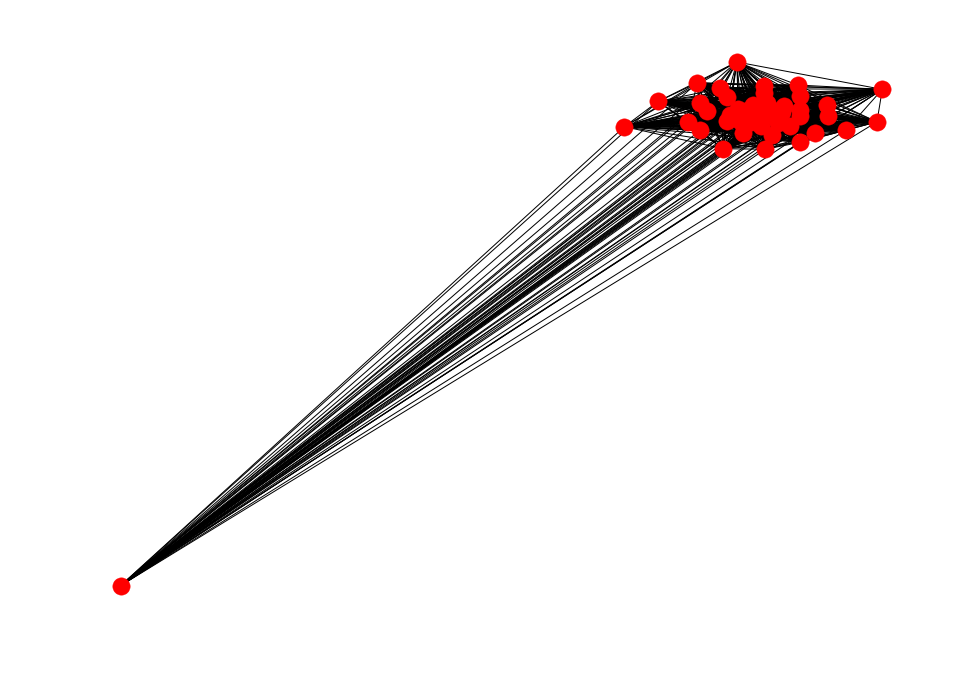

In [72]:
nx.draw(G)